In [3]:
%matplotlib inline


import numpy as np
from matplotlib import pyplot as plt
#import pandas as pd
import os
import glob
import re
#import scipy.io
#import copy
#import datetime 
#import time

#from sklearn.model_selection import train_test_split
#from tqdm.notebook import tqdm

import torch
#from torch.utils.data import DataLoader, TensorDataset
#from torch.utils.tensorboard import SummaryWriter
#import torch.nn as nn
#import torch.nn.functional as F
#from torch import optim

#from torchsummary import summary

#import src.functions as fn
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 12

In [63]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('this computation is running on {}'.format(device))
device_name = str(device)[:3]



this computation is running on cpu


In [64]:
def mulitnomial_prediction(seed, model, temperature=0.4, predict_len=500):
    lstm = model.eval()
    initial_str = seed
    #### word generator: from https://github.com/aladdinpersson/Machine-Learning-Collection/blob/master/ML/Projects/text_generation_babynames/generating_names.py 19.01.22
    hidden = lstm.init_state(1)
    
    initial_input = fn.text_to_torch(initial_str, raw_text).long()
    predicted = initial_str

    # predicted hidden state for first characters
    for p in range(len(initial_str)-1):
        _, hidden = lstm(initial_input[p].to(device), hidden)
        
    last_char = initial_input[-1]
    for p in range(predict_len):
        output, hidden = lstm(last_char.to(device), hidden)
        output_dist = output.view(-1).div(temperature).exp()
        top_char = torch.multinomial(output_dist, 1)[0]

        predicted_char = fn.torch_to_text(top_char.cpu(), raw_text)[0]
        predicted += predicted_char
        last_char = fn.text_to_torch(predicted_char, raw_text).long()[0]

    return predicted

### Auswertung der epoch loss daten

data/gru20220205_1437122seqlen100hs512b20epoch70.npy
data/gru20220205_1354092seqlen10hs512b20epoch70.npy
data/gru20220205_1418342seqlen50hs512b20epoch70.npy
data/gru20220205_1600102seqlen200hs512b20epoch70.npy
data/gru20220205_1846542seqlen140hs512b20epoch70.npy


(0.0, 70.0)

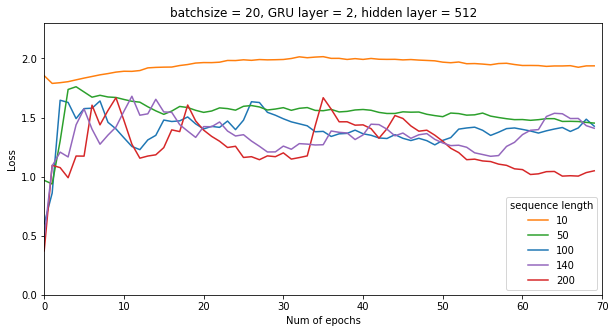

In [65]:
# laden der epoch loss npy
# loading model

load_loss = glob.glob('data/gru2022*.npy')
plt.figure(figsize=(10,5))

for file in load_loss:
    print(file)
    d_name = file
    parameter = re.findall('\d+', d_name)
    seq_len = parameter[2]
    hidden_s = parameter[3]
    batch_s = parameter[4]
    data_load = np.load(d_name)
    plt.plot(data_load, label=str(seq_len))

handles, labels = plt.gca().get_legend_handles_labels()
order = [1,2,0,4,3]
plt.xlabel('Num of epochs')
plt.ylabel('Loss')
plt.title('batchsize = %i, GRU layer = 2, hidden layer = %i'%(int(batch_s), int(hidden_s)) )
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]
          ,title='sequence length')
plt.ylim(0,2.3)
plt.xlim(0,70)
#plt.savefig('results_seq_len.svg', format='svg')


hidden size:512, last loss: 0.249442
hidden size:256, last loss: 1.700793
hidden size:1024, last loss: 0.221991


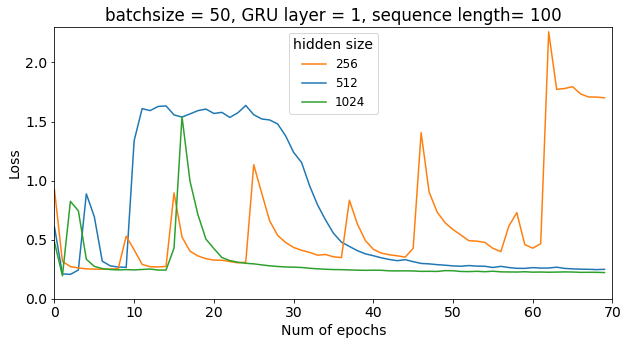

In [5]:
# laden der epoch loss npy
# loading model

load_loss = glob.glob('data/gru1layer*.npy')
plt.figure(figsize=(10,5))

for file in load_loss:
    #print(file)
    d_name = file
    parameter = re.findall('\d+', d_name)
    seq_len = parameter[3]
    hidden_s = parameter[4]
    batch_s = parameter[5]

    data_load = np.load(d_name)
    plt.plot(data_load, label=str(hidden_s))
    print('hidden size:%i, last loss: %f'%(int(hidden_s), data_load[-1]))
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0,2]
plt.xlabel('Num of epochs')
plt.ylabel('Loss')
plt.title('batchsize = %i, GRU layer = 1, sequence length= %i'%(int(batch_s), int(seq_len)) )
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]
          ,title='hidden size')
plt.ylim(0,2.3)
plt.xlim(0,70)
#plt.savefig('results_layer1.svg', format='svg')

hidden size:1024, last loss: 1.204235
hidden size:512, last loss: 1.300438
hidden size:256, last loss: 2.115550


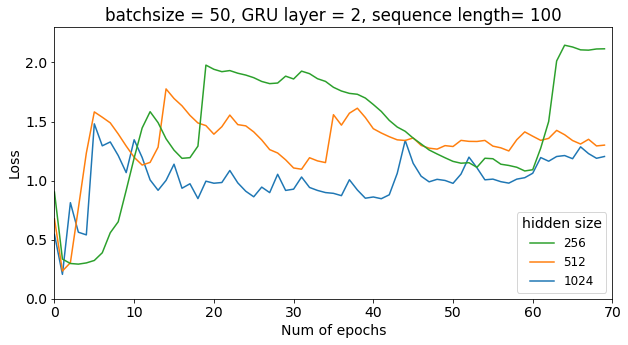

In [6]:
# laden der epoch loss npy
# loading model

load_loss = glob.glob('data/gru2layer*.npy')
plt.figure(figsize=(10,5))

for file in load_loss:
    #print(file)
    d_name = file
    parameter = re.findall('\d+', d_name)
    #print(parameter)
    seq_len = parameter[3]
    hidden_s = parameter[4]
    batch_s = parameter[5]

    data_load = np.load(d_name)

    plt.plot(data_load, label=str(hidden_s))
    print('hidden size:%i, last loss: %f'%(int(hidden_s), data_load[-1]))
handles, labels = plt.gca().get_legend_handles_labels()
order = [2,1,0]
plt.xlabel('Num of epochs')
plt.ylabel('Loss')
plt.title('batchsize = %i, GRU layer = 2, sequence length= %i'%(int(batch_s), int(seq_len)) )
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]
          ,title='hidden size')
plt.ylim(0,2.3)
plt.xlim(0,70)
#plt.savefig('results_layer2.svg', format='svg')

batchsize: 5, log loss0.960860
batchsize: 50, log loss1.174494
batchsize: 50, log loss1.139700


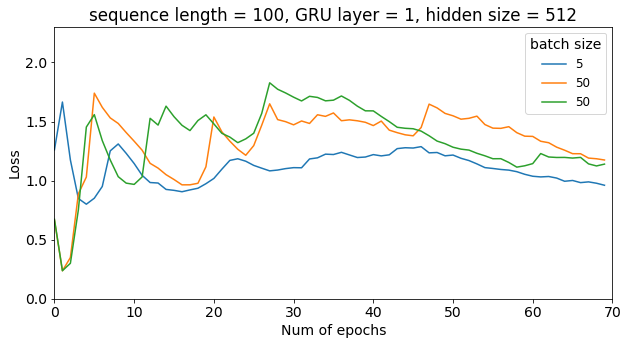

In [12]:
# laden der epoch loss npy
# loading model

load_loss = glob.glob('data/grubatch*.npy')
plt.figure(figsize=(10,5))

for file in load_loss:
    #print(file)
    d_name = file
    parameter = re.findall('\d+', d_name)
    if parameter[4] == '10':
        pass
    else:
        #print(parameter)
        seq_len = parameter[2]
        hidden_s = parameter[3]
        batch_s = parameter[4]

        data_load = np.load(d_name)
        plt.plot(data_load, label=str(batch_s))
        print('batchsize: %i, log loss%f'%(int(batch_s),data_load[-1]))
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2]
plt.xlabel('Num of epochs')
plt.ylabel('Loss')
plt.title('sequence length = %i, GRU layer = 1, hidden size = %i'%(int(seq_len), int(hidden_s)) )
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]
          ,title='batch size')
plt.ylim(0,2.3)
plt.xlim(0,70)
#plt.savefig('results_batch.svg', format='svg')